# Data Wrangling in Julia

As you might be realizing I am very interested in Julia right now!! I thought I would throw together a quick notebook to help myself and maybe others learn how to wrangle data in Julia. This is not meant to be comprehensive or super polished but rather just a quick dirty attempt to get familiar with Julia with a few notes about things learned... 

In [1]:
using Queryverse # awesome Data Science package that has a lot of tools in it

# load some data into a dataframe
df = load("/home/mcamp/JuliaProjects/eeg-brain-wave-for-confusion/EEG_data.csv") |> DataFrame

head(df)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
1,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
2,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
3,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
4,0.0,0.0,47.0,57.0,-5.0,2.01224e6,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
5,0.0,0.0,44.0,53.0,-8.0,1.00515e6,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
6,0.0,0.0,44.0,66.0,73.0,1.78645e6,176766.0,59352.0,26157.0,15054.0,33669.0,33782.0,31750.0,0.0,0.0


In [2]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
1,SubjectID,4.48739,0.0,4.0,9.0,,,Float64
2,VideoID,4.3906,0.0,4.0,9.0,,,Float64
3,Attention,41.3139,0.0,43.0,100.0,,,Float64
4,Mediation,47.1827,0.0,51.0,100.0,,,Float64
5,Raw,65.5708,-2048.0,35.0,2047.0,,,Float64
6,Delta,6.05785e5,448.0,395487.0,3.96466e6,,,Float64
7,Theta,1.68053e5,17.0,81331.0,3.0078e6,,,Float64
8,Alpha1,41384.4,2.0,17500.0,1.36996e6,,,Float64
9,Alpha2,33183.4,2.0,14959.0,1.01691e6,,,Float64
10,Beta1,24318.4,3.0,12818.0,1.06778e6,,,Float64


Queryverse has a neat data exploration tool and it can be accessed this way. It is still early in its development and so does have some limitations.  

In [3]:
df |> DataFrame |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000033) paused, 0 bytes waiting), Process(`/home/mcamp/.julia/packages/Electron/OaUmW/src/../deps/electron/electron /home/mcamp/.julia/packages/Electron/OaUmW/src/main.js /tmp/juliaelectron-25251-1 /tmp/juliaelectron-sysnotify-25251-1 iSQjYlO0ajCqdMm3uMmEQSQGckoPKs0vK96UEF5zmxAKo2xhfeeTFm9d55ZDxsy21nbBPPhA6S7bsnhHbZKQW5IJ26QPyi13qkIdU/DrCLghahEAwhAZuI0RQQamaxF8ewHdS3TOSbYGYSF/8Ksq2ibDex+q/Te/+mMPaPG7akM=`, ProcessRunning), [1 window]), 1, true))

Indexing a Column can be done in a similar manner as Pandas

In [4]:
df.Raw[1:5]

5-element Array{Float64,1}:
 278.0
 -50.0
 101.0
  -5.0
  -8.0

In [5]:
df[:SubjectID][1:5]

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [6]:
df.user-definedlabeln # will not work because of the `-`.. Spaces are also the devil!

KeyError: KeyError: key :user not found

Column names are not of the type String but rather Symbol. So to index a column by name we need to cast the name to a Symbol.

In [7]:
df[Symbol("user-definedlabeln")][1:5]

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

If you ask me that is a bit clunky and a pain to type. Peter Deffebach in the Julia Slack channel shared this trick with me and I really liked it.

In [8]:
# we create a macro for converting a String to a Symbol
macro __str(x)
       :(Symbol($x))
end

# now we can do something like this... 
df[_"user-definedlabeln"][1:5]

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

Maybe we would rather rename the column to something else. To do that we can do the following.

In [9]:
cols = names(df) # gets all the column names and saves them in a variable of `cols`
# this is a mutable data type so we can do something like
cols[15] = _"UserDefinedLabel" # rename the column.. don't forget to cast it as a Symbol
cols[14] = _"PreDefinedLabel"
names!(df, cols) #use the julia ! to alter df in place

# create a dict for maping int => labels
cats = Dict(0 => "Not Confused", 1 => "Confused")


df[:PreDefinedLabel] = [Int64(x) for x in df[:PreDefinedLabel]] 
df[:UserDefinedLabel] = [Int64(x) for x in df[:UserDefinedLabel]]
df[:SubjectID] = [Int64(x) for x in df[:SubjectID]] 
df[:VideoID] = [Int64(x) for x in df[:VideoID]]

# convert 0/1 to the human readable labels
df[_"Predefined Label"] = [cats[x] for x in df[:PreDefinedLabel]] 
df[_"User Defined Label"] = [cats[x] for x in df[:UserDefinedLabel]]
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
1,SubjectID,4.48739,0,4.0,9,,,Int64
2,VideoID,4.3906,0,4.0,9,,,Int64
3,Attention,41.3139,0.0,43.0,100.0,,,Float64
4,Mediation,47.1827,0.0,51.0,100.0,,,Float64
5,Raw,65.5708,-2048.0,35.0,2047.0,,,Float64
6,Delta,6.05785e5,448.0,395487.0,3.96466e6,,,Float64
7,Theta,1.68053e5,17.0,81331.0,3.0078e6,,,Float64
8,Alpha1,41384.4,2.0,17500.0,1.36996e6,,,Float64
9,Alpha2,33183.4,2.0,14959.0,1.01691e6,,,Float64
10,Beta1,24318.4,3.0,12818.0,1.06778e6,,,Float64


In [10]:
# we are able to convert the categoricl fields to an actual categorical type
# but unfortunetly this data type is not currently supported by the Queryverse
categorical!(df,:SubjectID)
categorical!(df,:UserDefinedLabel)
categorical!(df,:PreDefinedLabel)
categorical!(df,_"Predefined Label")
categorical!(df,_"User Defined Label")
categorical!(df,:VideoID)
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
1,SubjectID,,"CategoricalValue{Int64,UInt32} 0",,"CategoricalValue{Int64,UInt32} 9",10,,"CategoricalValue{Int64,UInt32}"
2,VideoID,,"CategoricalValue{Int64,UInt32} 0",,"CategoricalValue{Int64,UInt32} 9",10,,"CategoricalValue{Int64,UInt32}"
3,Attention,41.3139,0.0,43.0,100.0,,,Float64
4,Mediation,47.1827,0.0,51.0,100.0,,,Float64
5,Raw,65.5708,-2048.0,35.0,2047.0,,,Float64
6,Delta,6.05785e5,448.0,395487.0,3.96466e6,,,Float64
7,Theta,1.68053e5,17.0,81331.0,3.0078e6,,,Float64
8,Alpha1,41384.4,2.0,17500.0,1.36996e6,,,Float64
9,Alpha2,33183.4,2.0,14959.0,1.01691e6,,,Float64
10,Beta1,24318.4,3.0,12818.0,1.06778e6,,,Float64


Plots are pretty easy to make with Queryverse. 

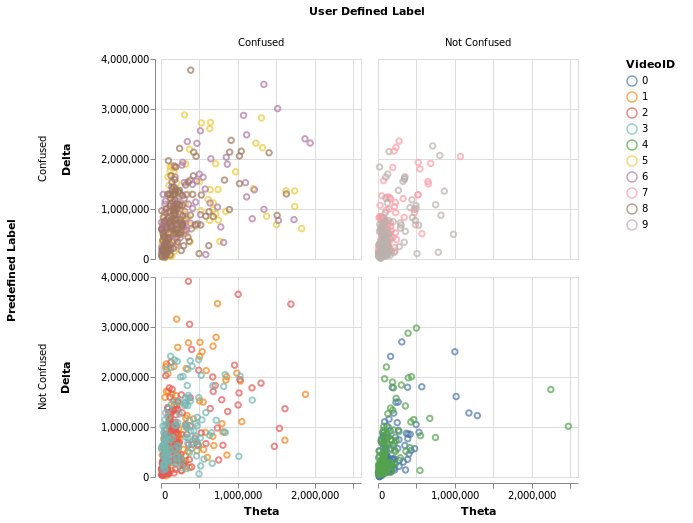

In [12]:
# save subjectID 1 as a variabel 
# from the df pipe in all records for subjectID 1 and then piped into a VegaLite plot
df |> 
    @filter(_.SubjectID == 5) |> 
    @vlplot(:point, x=:Theta, 
                    y=:Delta, 
                    row=_"Predefined Label", 
                    column=_"User Defined Label",
                    color="VideoID:n"
)